In [1]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
#import needed libraries

In [2]:
#load the dataset
df=pd.read_csv("ship.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
 df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

null values  are present in "Age  Cabin Embarked" columns.    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


there are 3 types ot datatypes present in the datasets.float64(2), int64(5), object(5) 

In [8]:
for i in df.columns:
    print (df[i].value_counts())
    print("\n")

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length

<AxesSubplot:>

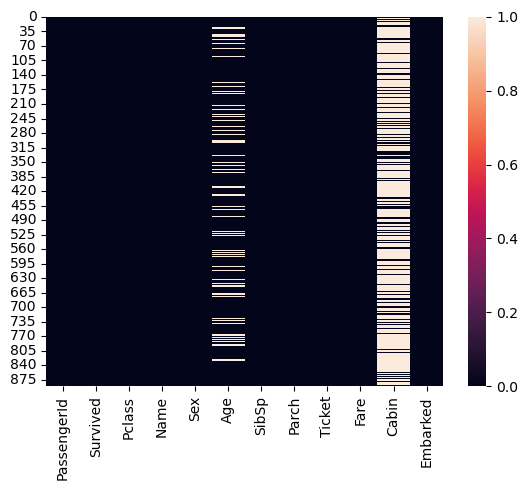

In [9]:
sns.heatmap(df.isnull())

# relace the null values

In [10]:
df["Embarked"].isnull().sum()

2

In [11]:
df["Age"].isnull().sum()

177

In [12]:
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)


In [13]:
print("the mean of age:",df["Age"].mean())

the mean of age: 29.69911764705882


In [14]:
df['Age']=df['Age'].fillna(df['Age'].mean())

 replace the null value in the "age"columns.

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
df.shape

(891, 12)

<AxesSubplot:>

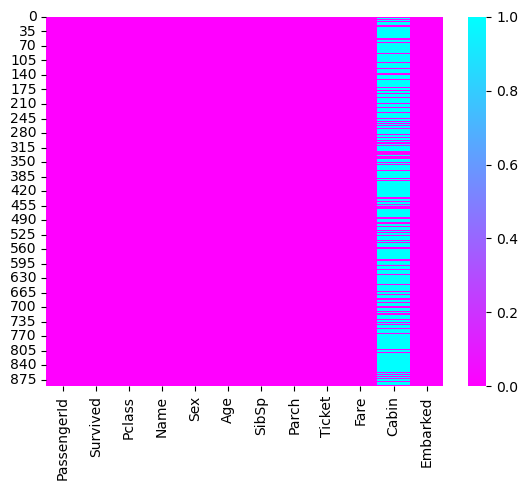

In [17]:
sns.heatmap(df.isnull(),cmap="cool_r")

In [18]:
df.drop("Cabin",axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


to my observation "cabin"column doesnot contripute the prediction process at anyway.so i drop the column.

In [19]:
categoric_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categoric_col.append(i)
print("categoric col:",categoric_col)
print("\n")


numeric_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numeric_col.append(i)
print("numeric col:",numeric_col)
print("\n")
        
        

categoric col: ['Name', 'Sex', 'Ticket', 'Embarked']


numeric col: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']




separate the numeric column and categorical column.

In [20]:
df.nunique().to_frame("no.of unique_values")

,no.of unique_values
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,681
Fare,248


# Describe the data set

In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


huge different b/w the 75% and max range of the [PassengerId,Age,SibSp,Parch,Fare],there is possible to present outliers


# data visualization

0    549
1    342
Name: Survived, dtype: int64


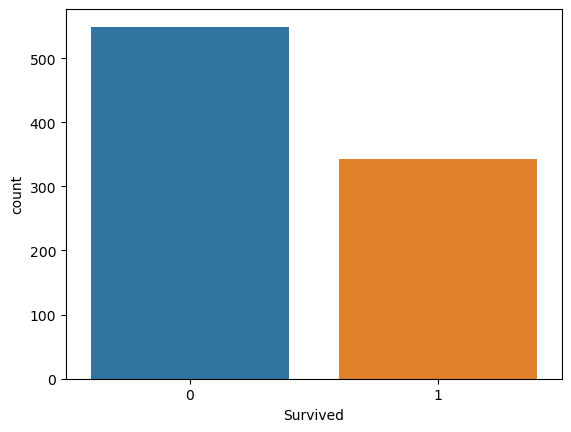

In [22]:
ax=sns.countplot(x="Survived",data=df)
print(df["Survived"].value_counts())

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


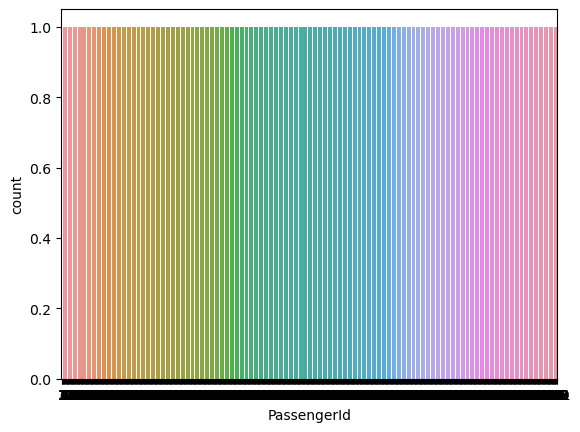

In [23]:
print(df["PassengerId"].value_counts())
ax=sns.countplot(x="PassengerId",data=df)
plt.show()

3    491
1    216
2    184
Name: Pclass, dtype: int64


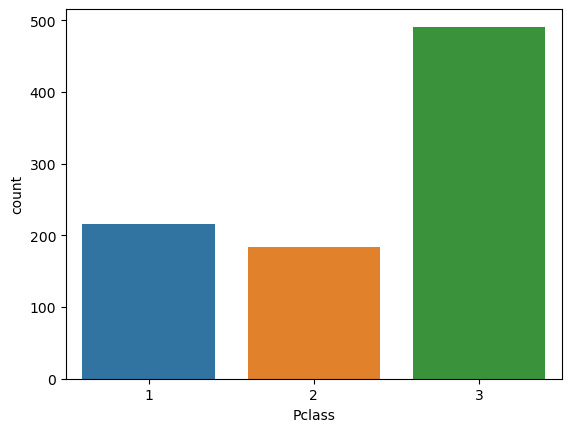

In [24]:
print(df["Pclass"].value_counts())
ax=sns.countplot(x="Pclass",data=df)
plt.show()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64


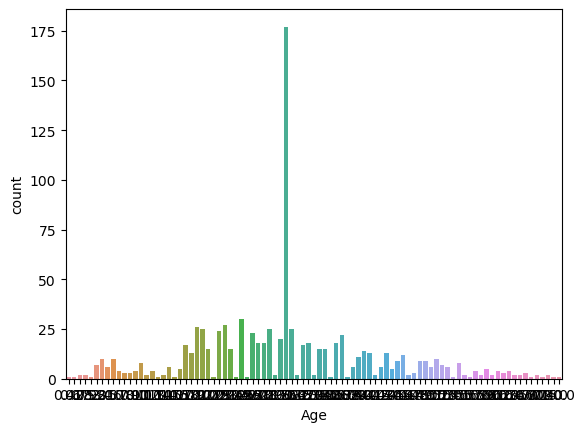

In [25]:
print(df["Age"].value_counts())
ax=sns.countplot(x="Age",data=df)
plt.show()

male      577
female    314
Name: Sex, dtype: int64


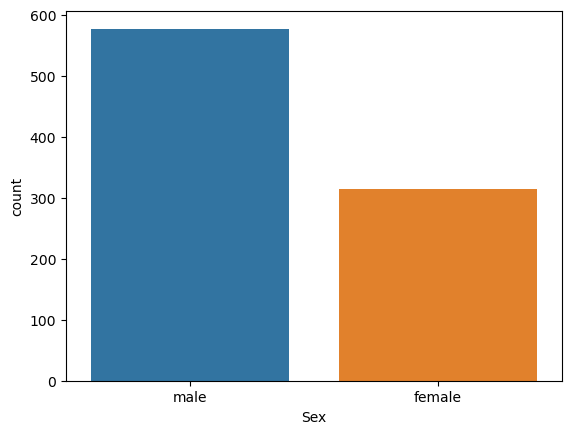

In [26]:
print(df["Sex"].value_counts())
ax=sns.countplot(x="Sex",data=df)
plt.show()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


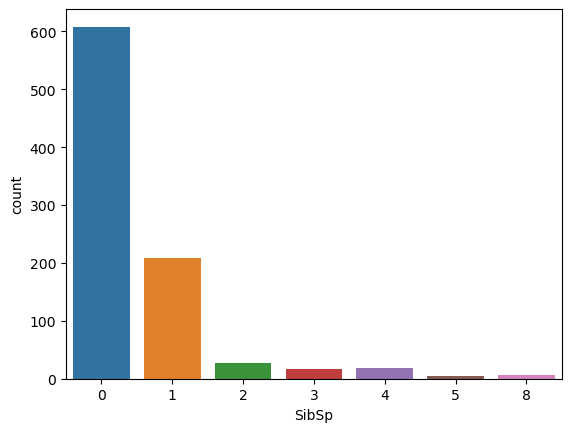

In [27]:
print(df["SibSp"].value_counts())
ax=sns.countplot(x="SibSp",data=df)
plt.show()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


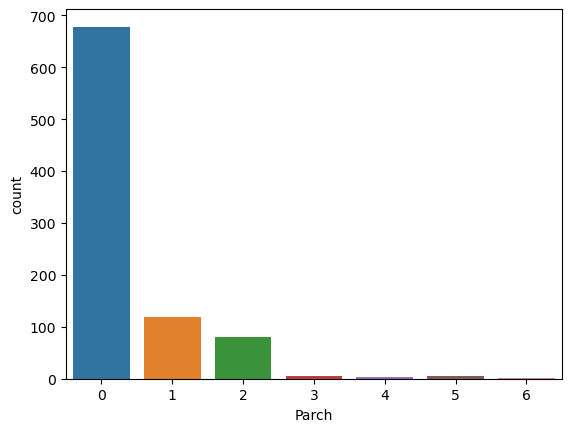

In [28]:
print(df["Parch"].value_counts())
ax=sns.countplot(x="Parch",data=df)
plt.show()

# bivarite analysis

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


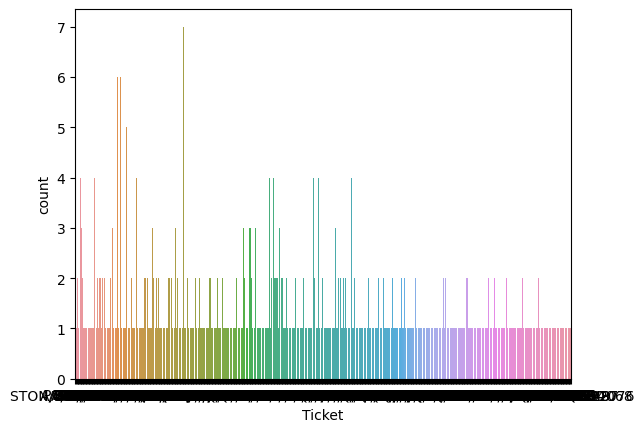

In [29]:
print(df["Ticket"].value_counts())
ax=sns.countplot(x="Ticket",data=df)
plt.show()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


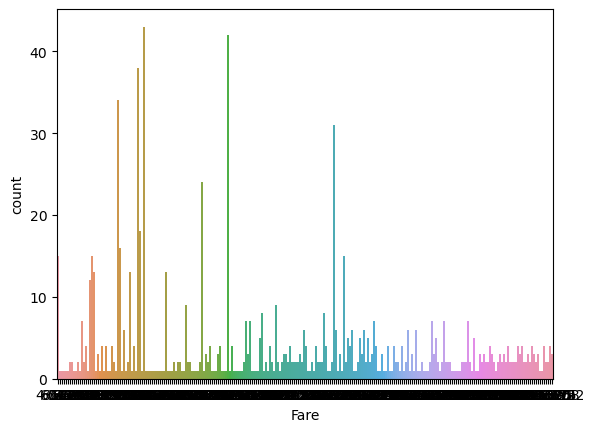

In [30]:
print(df["Fare"].value_counts())
ax=sns.countplot(x="Fare",data=df)
plt.show()

S    646
C    168
Q     77
Name: Embarked, dtype: int64


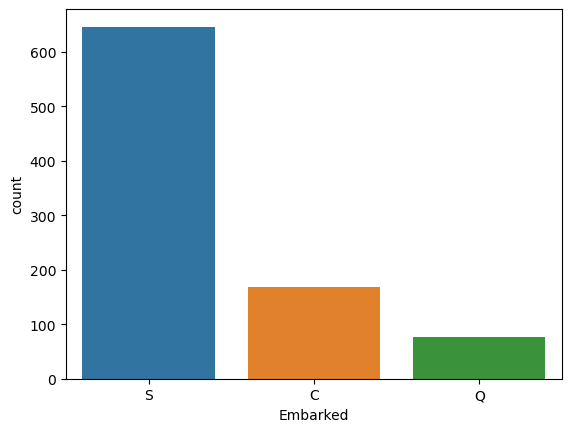

In [31]:
print(df["Embarked"].value_counts())
ax=sns.countplot(x="Embarked",data=df)
plt.show()

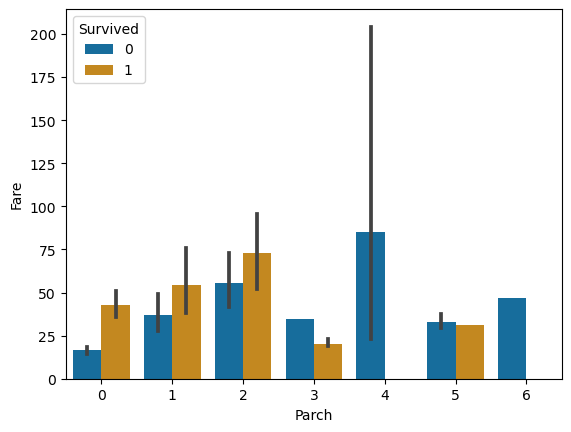

In [32]:
sns.barplot(x="Parch",y="Fare",hue="Survived",data=df,palette="colorblind")
plt.show()

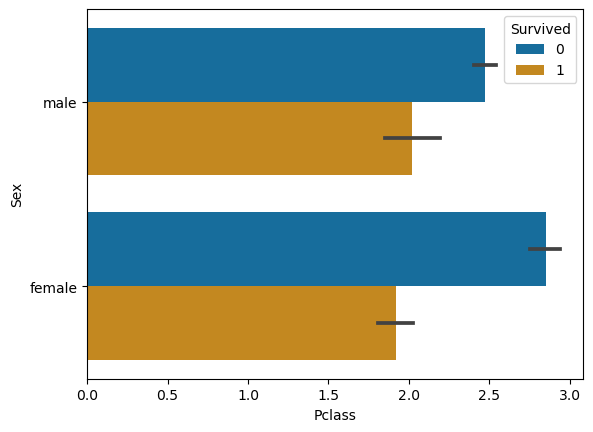

In [33]:
sns.barplot(x="Pclass",y="Sex",hue="Survived",data=df,palette="colorblind")
plt.show()

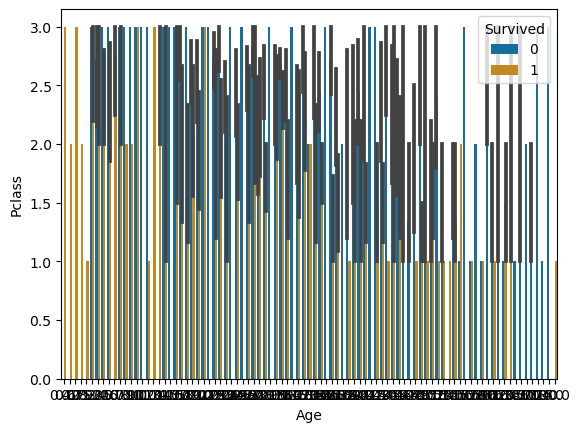

In [34]:
sns.barplot(x="Age",y="Pclass",hue="Survived",data=df,palette="colorblind")
plt.show()

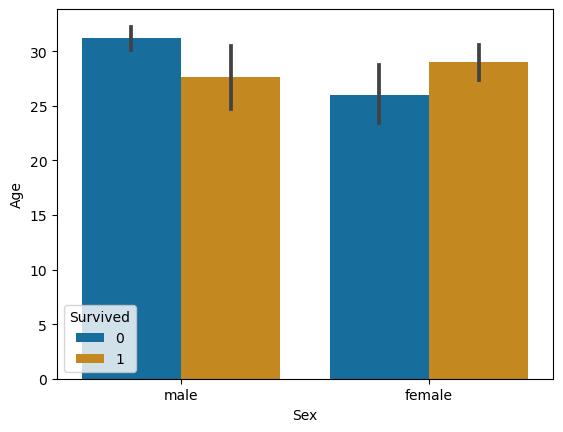

In [35]:
sns.barplot(x="Sex",y="Age",hue="Survived",data=df,palette="colorblind")
plt.show()

# multivariate analysis

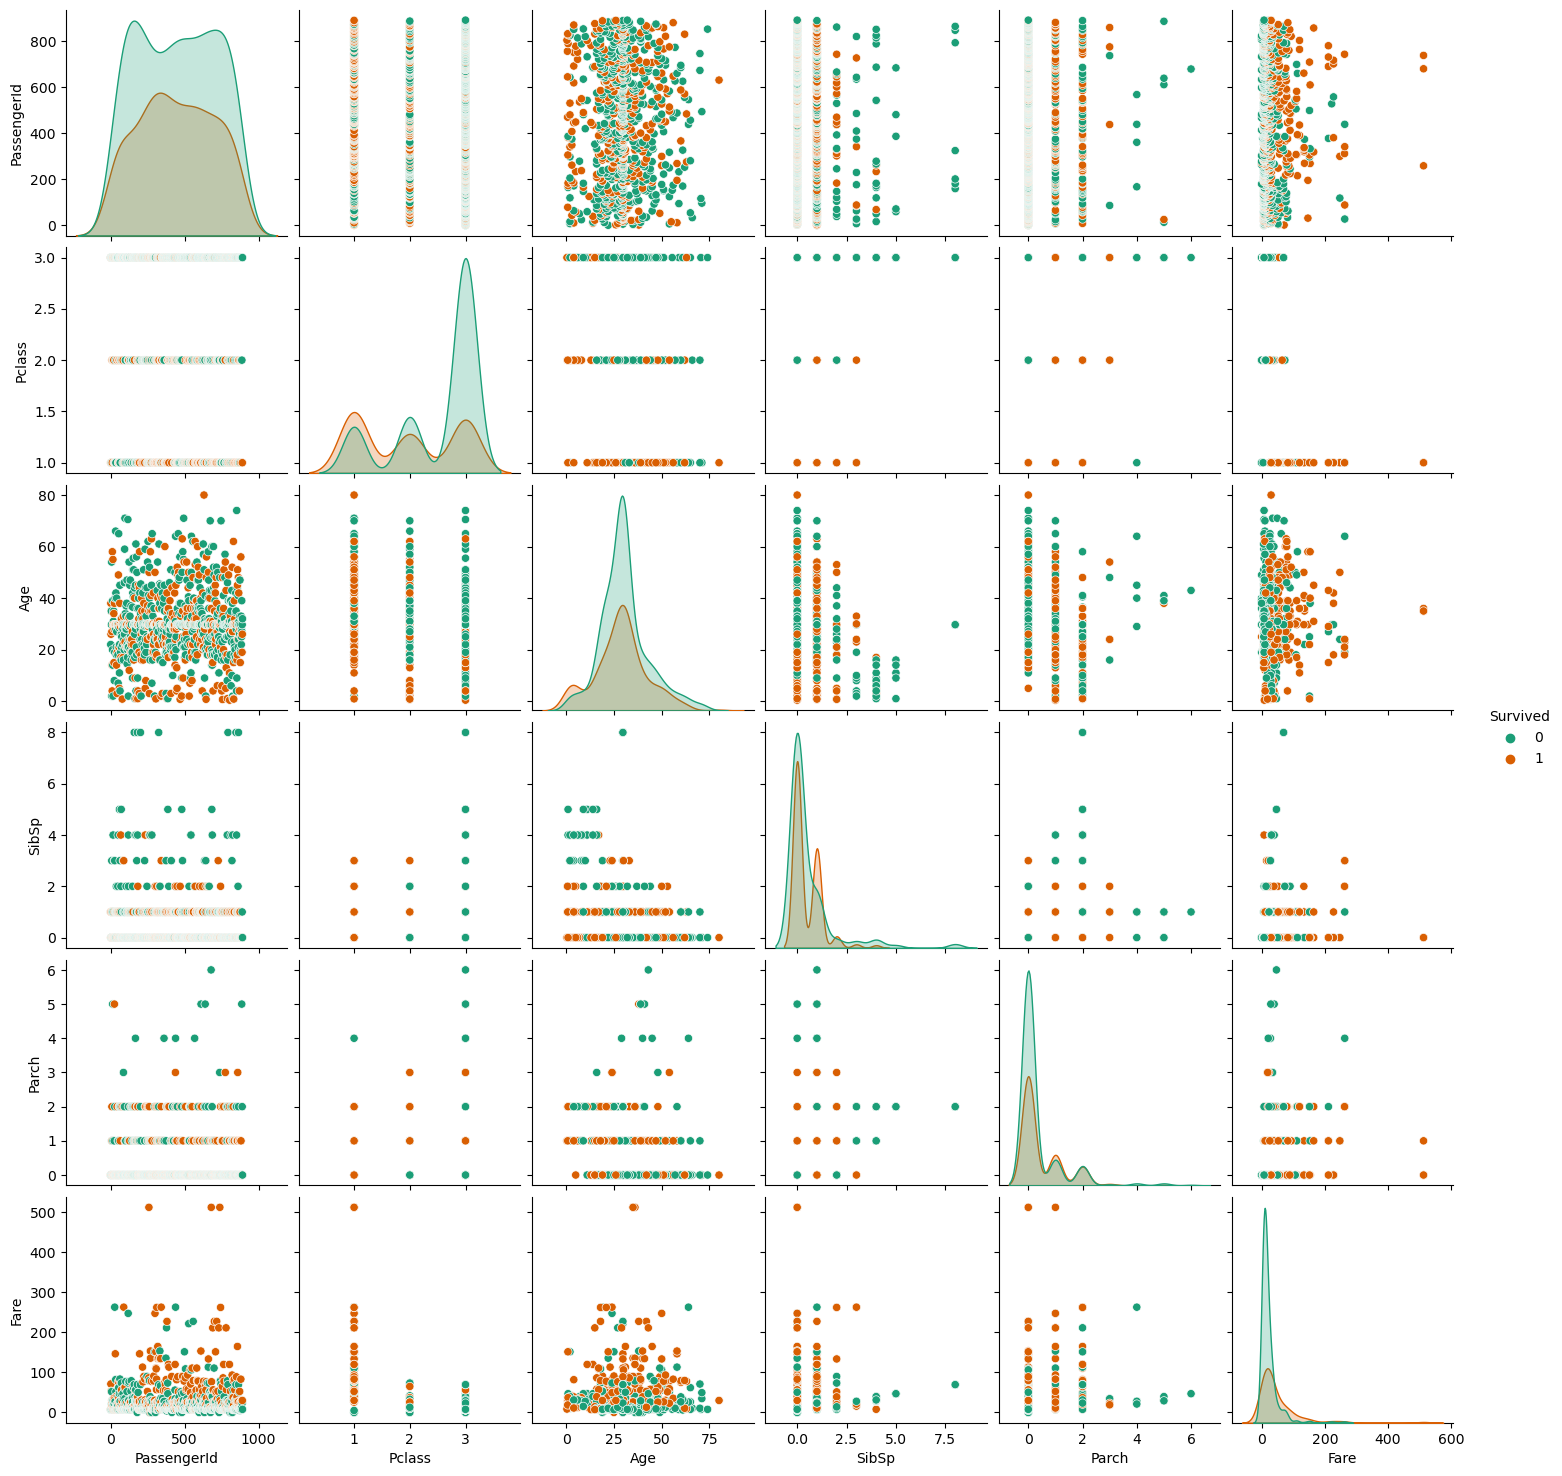

In [36]:
sns.pairplot(df,hue="Survived",palette="Dark2")
plt.show()

# outliers checking

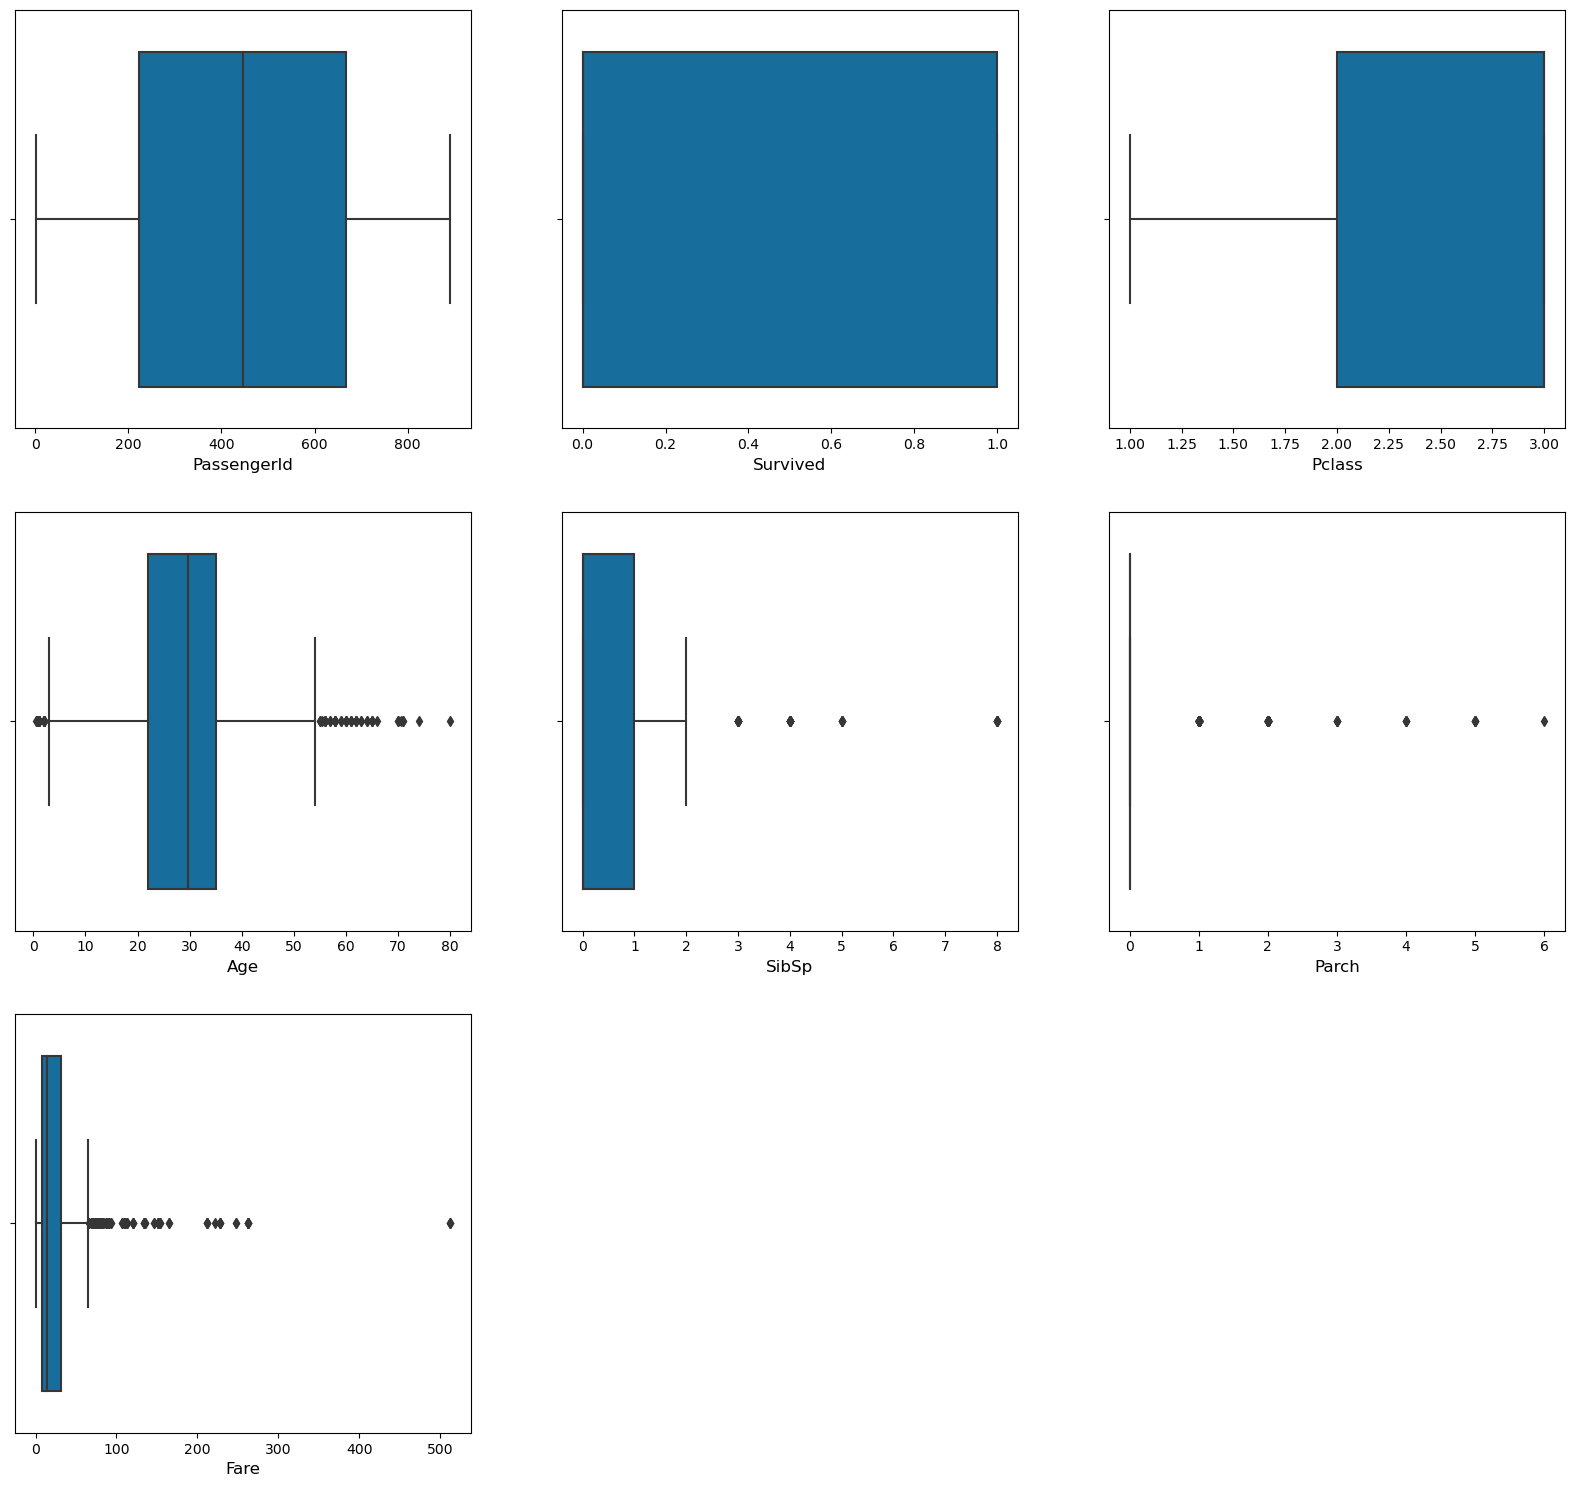

In [37]:
plt.figure(figsize=(20,25))
p=1
for i in numeric_col:
    if p<=17:
        ax=plt.subplot(4,3,p)
        sns.boxplot(df[i],palette="colorblind")
        plt.xlabel(i,fontsize=12)
        plt.yticks(rotation=0,fontsize=12)
    p+=1
plt.show()    

outliers present in the [age ,sibsp,parch,fare]columns.

In [38]:
from scipy.stats import zscore
out_features=df[['Age', 'SibSp',  'Parch', 'Fare']]
z=np.abs(zscore(out_features))
z

,Age,SibSp,Parch,Fare
0,0.592481,0.432793,0.473674,0.502445
1,0.638789,0.432793,0.473674,0.786845
2,0.284663,0.474545,0.473674,0.488854
3,0.407926,0.432793,0.473674,0.420730
4,0.407926,0.474545,0.473674,0.486337
...,...,...,...,...
886,0.207709,0.474545,0.473674,0.386671
887,0.823344,0.474545,0.473674,0.044381
888,0.000000,0.432793,2.008933,0.176263
889,0.284663,0.474545,0.473674,0.044381


In [39]:
np.where(z>3)


(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([2, 1, 2, 3, 1, 1, 1, 1, 2, 3, 0, 0, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        3, 1, 1, 1, 3, 3, 1, 3, 2, 3, 3, 1, 2, 2, 3, 1, 0, 3, 1, 1, 3, 2,
        2, 0, 2, 0, 2, 3, 1, 1, 3, 3, 3, 3, 2, 3, 3, 0, 2, 3, 1, 1, 1, 1,
        1, 1, 0, 2, 1, 2], dtype=int64))

In [40]:
df1=df[(z<3).all(axis=1)]
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


remove the outliers

In [41]:
df.shape

(891, 11)

In [42]:
df1.shape

(820, 11)

check the shape after removing a outliers

In [43]:
df=df1

# skewness checking

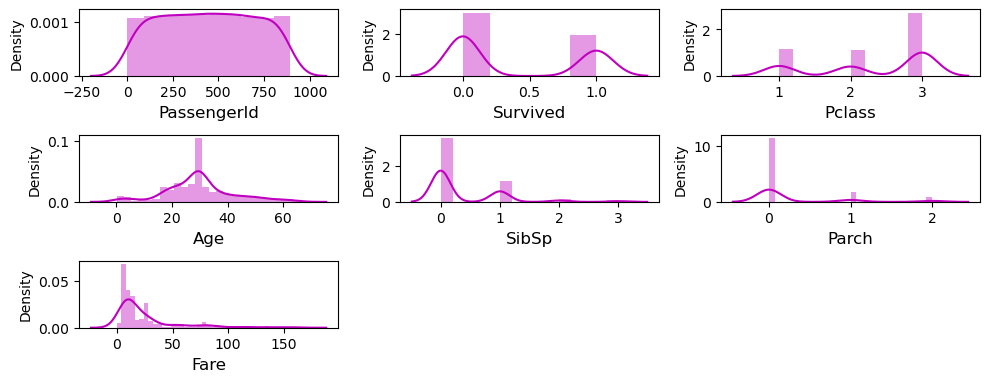

In [44]:
plt.figure(figsize=(10,6),facecolor= "white")
plotnumper = 1
for i in numeric_col:
    if plotnumper<=18:
        plt.subplot(5,3,plotnumper)
        sns.distplot(df[i],color = 'm')
        plt.xlabel(i,fontsize = 12)
        plt.yticks(rotation = 0,fontsize = 10)
    plotnumper+=1
plt.tight_layout() 

skewness present in the [SibSp Parch Fare] columns

In [45]:
df.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Age            0.318314
SibSp          1.979577
Parch          2.122629
Fare           2.318761
dtype: float64

# removing the skewness

In [46]:
df["Fare"]=np.cbrt(df["Fare"])

In [47]:
df["Parch"]=np.cbrt(df["Parch"])

In [48]:
df["SibSp"]=np.cbrt(df["SibSp"])

In [49]:
df.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Age            0.318314
SibSp          1.018770
Parch          1.643259
Fare           0.708623
dtype: float64

# encoding the categorical data

In [50]:
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))

df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,88.0,1.0,22.000000,1.0,0.000000,511.0,1.935438,2.0
1,2,1,1,167.0,0.0,38.000000,1.0,0.000000,579.0,4.146318,0.0
2,3,1,3,315.0,0.0,26.000000,0.0,0.000000,647.0,1.993730,2.0
3,4,1,1,241.0,0.0,35.000000,1.0,0.000000,48.0,3.758647,2.0
4,5,0,3,14.0,1.0,35.000000,0.0,0.000000,461.0,2.004158,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,506.0,1.0,27.000000,0.0,0.000000,99.0,2.351335,2.0
887,888,1,1,265.0,0.0,19.000000,0.0,0.000000,14.0,3.107233,2.0
888,889,0,3,374.0,0.0,29.699118,1.0,1.259921,653.0,2.862294,2.0
889,890,1,1,62.0,1.0,26.000000,0.0,0.000000,8.0,3.107233,0.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  820 non-null    int64  
 1   Survived     820 non-null    int64  
 2   Pclass       820 non-null    int64  
 3   Name         820 non-null    float64
 4   Sex          820 non-null    float64
 5   Age          820 non-null    float64
 6   SibSp        820 non-null    float64
 7   Parch        820 non-null    float64
 8   Ticket       820 non-null    float64
 9   Fare         820 non-null    float64
 10  Embarked     820 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 76.9 KB


In [52]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,445.719512,0.390244,2.310976,409.500000,0.657317,29.792831,0.301521,0.207044,323.064634,2.644247,1.540244
std,255.213085,0.488103,0.826678,236.857904,0.474896,12.151418,0.480608,0.430778,194.859943,0.925570,0.788866
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226.750000,0.000000,2.000000,204.750000,0.000000,23.000000,0.000000,0.000000,148.750000,1.991279,1.000000
50%,446.500000,0.000000,3.000000,409.500000,1.000000,29.699118,0.000000,0.000000,322.500000,2.351335,2.000000
75%,661.250000,1.000000,3.000000,614.250000,1.000000,35.000000,1.000000,0.000000,495.250000,3.000000,2.000000
max,891.000000,1.000000,3.000000,819.000000,1.000000,66.000000,1.442250,1.259921,658.000000,5.483329,2.000000


# correlation

In [53]:
cor=df.corr()
cor

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.013852,-0.027701,-0.052248,0.066160,0.007532,-0.041979,0.014762,-0.066074,-0.014596,0.019099
Survived,-0.013852,1.000000,-0.322306,-0.044727,-0.554888,-0.090926,0.145722,0.210930,-0.160183,0.363961,-0.154994
Pclass,-0.027701,-0.322306,1.000000,0.047719,0.138041,-0.327522,-0.115127,-0.078780,0.354875,-0.700239,0.122145
Name,-0.052248,-0.044727,0.047719,1.000000,0.003653,0.067868,-0.083514,-0.031414,0.056152,-0.050864,-0.007414
Sex,0.066160,-0.554888,0.138041,0.003653,1.000000,0.094544,-0.213195,-0.256155,0.064049,-0.268761,0.116708
Age,0.007532,-0.090926,-0.327522,0.067868,0.094544,1.000000,-0.112739,-0.253006,-0.092805,0.147130,-0.008781
SibSp,-0.041979,0.145722,-0.115127,-0.083514,-0.213195,-0.112739,1.000000,0.342683,-0.022545,0.376512,-0.048905
Parch,0.014762,0.210930,-0.078780,-0.031414,-0.256155,-0.253006,0.342683,1.000000,-0.037339,0.298984,-0.024873
Ticket,-0.066074,-0.160183,0.354875,0.056152,0.064049,-0.092805,-0.022545,-0.037339,1.000000,-0.179545,0.030385
Fare,-0.014596,0.363961,-0.700239,-0.050864,-0.268761,0.147130,0.376512,0.298984,-0.179545,1.000000,-0.194147


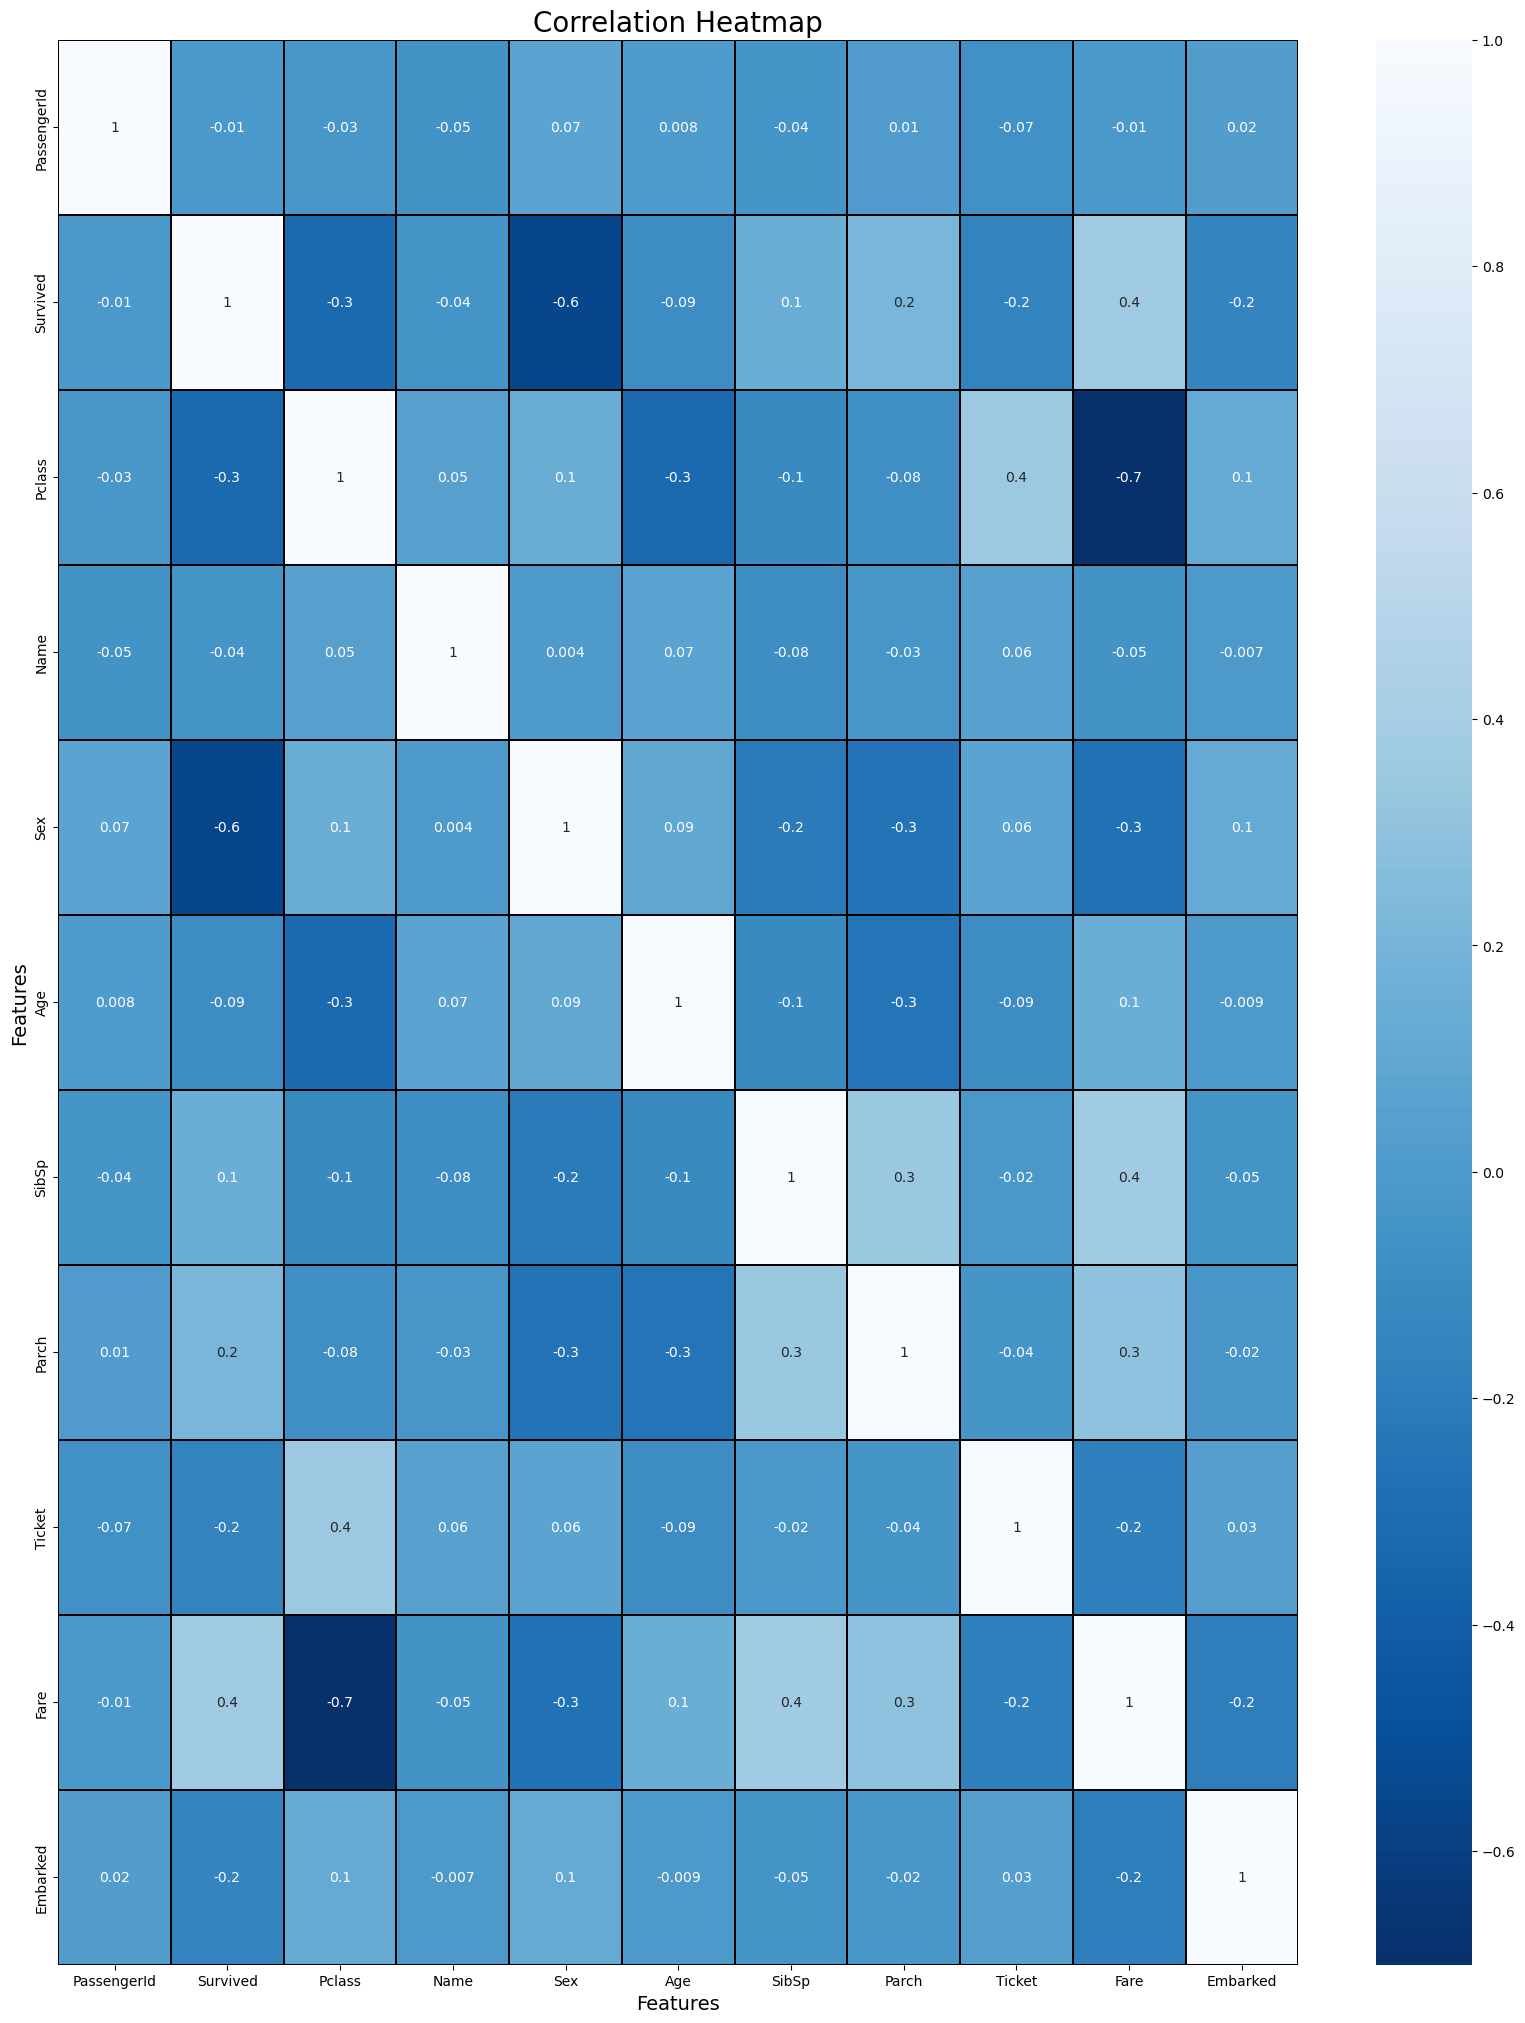

In [54]:
plt.figure(figsize=(20, 25))
sns.heatmap(df.corr(), annot=True, fmt='.1g', linewidth=0.2, linecolor='black', cmap='Blues_r')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

In [55]:
cor["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.363961
Parch          0.210930
SibSp          0.145722
PassengerId   -0.013852
Name          -0.044727
Age           -0.090926
Embarked      -0.154994
Ticket        -0.160183
Pclass        -0.322306
Sex           -0.554888
Name: Survived, dtype: float64

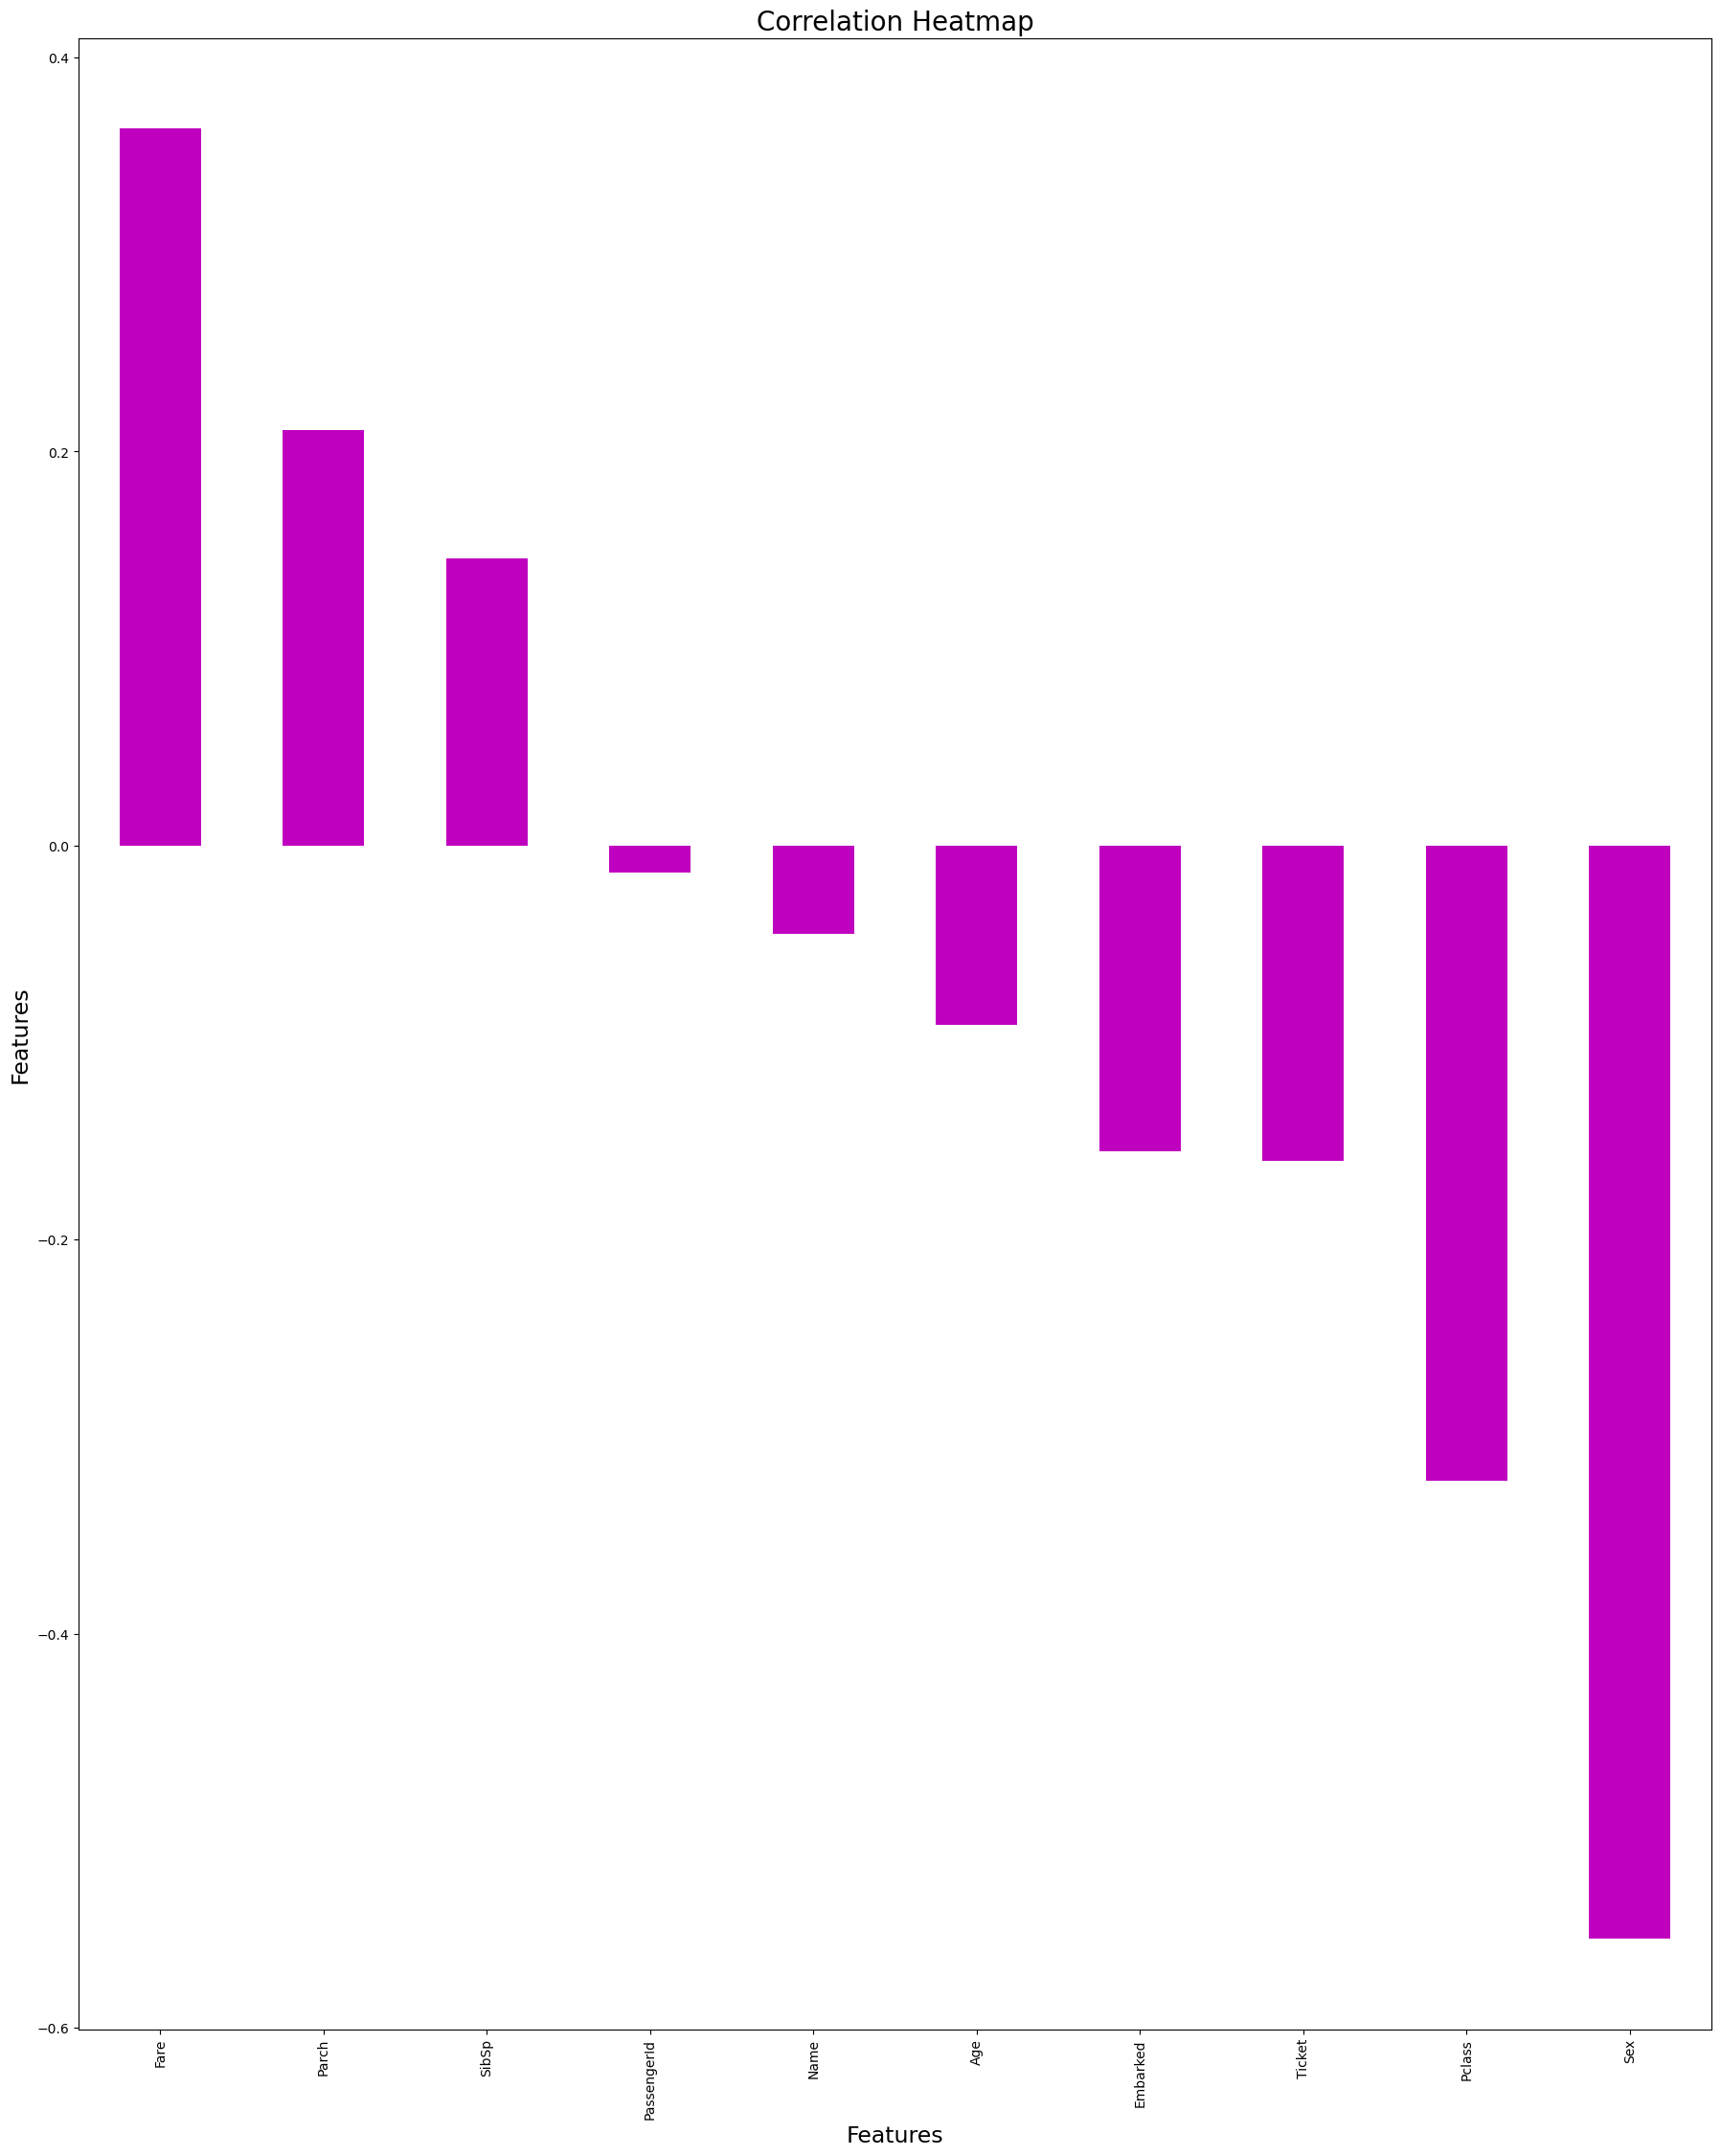

In [56]:
plt.figure(figsize=(22, 27))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color="m")
plt.xlabel('Features', fontsize=17)
plt.ylabel('Features', fontsize=17)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

# spliting the features and target variables

In [57]:
x=df.drop("Survived",axis=1)
y=df["Survived"]


In [58]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,88.0,1.0,22.000000,1.0,0.000000,511.0,1.935438,2.0
1,2,1,167.0,0.0,38.000000,1.0,0.000000,579.0,4.146318,0.0
2,3,3,315.0,0.0,26.000000,0.0,0.000000,647.0,1.993730,2.0
3,4,1,241.0,0.0,35.000000,1.0,0.000000,48.0,3.758647,2.0
4,5,3,14.0,1.0,35.000000,0.0,0.000000,461.0,2.004158,2.0
...,...,...,...,...,...,...,...,...,...,...
886,887,2,506.0,1.0,27.000000,0.0,0.000000,99.0,2.351335,2.0
887,888,1,265.0,0.0,19.000000,0.0,0.000000,14.0,3.107233,2.0
888,889,3,374.0,0.0,29.699118,1.0,1.259921,653.0,2.862294,2.0
889,890,1,62.0,1.0,26.000000,0.0,0.000000,8.0,3.107233,0.0


In [59]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

# scaling method

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,-1.743605,0.833995,-1.358182,0.722036,-0.641702,1.454211,-0.480921,0.965052,-0.766275,0.583162
1,-1.739685,-1.586804,-1.024445,-1.384973,0.675821,1.454211,-0.480921,1.314234,1.623850,-1.953669
2,-1.735764,0.833995,-0.399217,-1.384973,-0.312321,-0.627757,-0.480921,1.663416,-0.703257,0.583162
3,-1.731843,-1.586804,-0.711831,-1.384973,0.428785,1.454211,-0.480921,-1.412463,1.204749,0.583162
4,-1.727923,0.833995,-1.670797,0.722036,0.428785,-0.627757,-0.480921,0.708301,-0.691984,0.583162
...,...,...,...,...,...,...,...,...,...,...
815,1.730122,-0.376405,0.407666,0.722036,-0.229976,-0.627757,-0.480921,-1.150577,-0.316660,0.583162
816,1.734043,-1.586804,-0.610443,-1.384973,-0.888737,-0.627757,-0.480921,-1.587054,0.500522,0.583162
817,1.737964,0.833995,-0.149970,-1.384973,-0.007717,1.454211,2.445624,1.694226,0.235725,0.583162
818,1.741884,-1.586804,-1.468020,0.722036,-0.312321,-0.627757,-0.480921,-1.617864,0.500522,-1.953669


In [61]:
x.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# vif[variance_inflation_factor]

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.015662,PassengerId
1,2.533228,Pclass
2,1.020277,Name
3,1.146194,Sex
4,1.249735,Age
5,1.314575,SibSp
6,1.316880,Parch
7,1.166977,Ticket
8,2.657220,Fare
9,1.049003,Embarked


# machine learning

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier




In [65]:
maxAccu = 0
maxRs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred) 
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i
print("Best accuracy is:", maxAccu, "at random_state", maxRs)


Best accuracy is: 0.8943089430894309 at random_state 42


In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)


In [67]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR)) 
print(confusion_matrix(y_test, predLR)) 
print(classification_report(y_test, predLR)) 


0.7804878048780488
[[125  21]
 [ 33  67]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       146
           1       0.76      0.67      0.71       100

    accuracy                           0.78       246
   macro avg       0.78      0.76      0.77       246
weighted avg       0.78      0.78      0.78       246



In [68]:
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))


0.7926829268292683
[[127  19]
 [ 32  68]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       146
           1       0.78      0.68      0.73       100

    accuracy                           0.79       246
   macro avg       0.79      0.77      0.78       246
weighted avg       0.79      0.79      0.79       246



In [69]:
ETC = ExtraTreesClassifier()
ETC.fit(x_train, y_train)
predETC = ETC.predict(x_test)
print(accuracy_score(y_test, predETC)) 
print(confusion_matrix(y_test, predETC)) 
print(classification_report(y_test, predETC)) 


0.8130081300813008
[[132  14]
 [ 32  68]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       146
           1       0.83      0.68      0.75       100

    accuracy                           0.81       246
   macro avg       0.82      0.79      0.80       246
weighted avg       0.81      0.81      0.81       246



In [70]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC)) 
print(confusion_matrix(y_test, predRFC)) 
print(classification_report(y_test, predRFC)) 



0.8252032520325203
[[131  15]
 [ 28  72]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       146
           1       0.83      0.72      0.77       100

    accuracy                           0.83       246
   macro avg       0.83      0.81      0.81       246
weighted avg       0.83      0.83      0.82       246



In [71]:
BFC = BaggingClassifier()
BFC.fit(x_train, y_train)
predBFC = BFC.predict(x_test)
print(accuracy_score(y_test, predBFC)) 
print(confusion_matrix(y_test, predBFC)) 
print(classification_report(y_test, predBFC)) 


0.8089430894308943
[[133  13]
 [ 34  66]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       146
           1       0.84      0.66      0.74       100

    accuracy                           0.81       246
   macro avg       0.82      0.79      0.79       246
weighted avg       0.81      0.81      0.80       246



In [72]:
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))


0.8170731707317073
[[132  14]
 [ 31  69]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       146
           1       0.83      0.69      0.75       100

    accuracy                           0.82       246
   macro avg       0.82      0.80      0.80       246
weighted avg       0.82      0.82      0.81       246



In [73]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))


0.8089430894308943
[[128  18]
 [ 29  71]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.84       146
           1       0.80      0.71      0.75       100

    accuracy                           0.81       246
   macro avg       0.81      0.79      0.80       246
weighted avg       0.81      0.81      0.81       246



# cross validation

In [74]:
score=cross_val_score(ETC,x,y)
print(score)
print(score.mean())
print("Different B/W Accuray score and cross validation score is-:",accuracy_score(y_test,predETC)-score.mean())

[0.78658537 0.81097561 0.82317073 0.81707317 0.82926829]
0.8134146341463415
Different B/W Accuray score and cross validation score is-: -0.0004065040650407248


In [75]:
score=cross_val_score(BFC,x,y)
print(score)
print(score.mean())
print("Different B/W Accuray score and cross validation score is-:",accuracy_score(y_test,predBFC)-score.mean())

[0.65853659 0.79878049 0.84756098 0.81707317 0.84756098]
0.7939024390243903
Different B/W Accuray score and cross validation score is-: 0.015040650406504041


In [76]:
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Different B/W Accuray score and cross validation score is-:",accuracy_score(y_test,predABC)-score.mean())

[0.6402439  0.81707317 0.79268293 0.83536585 0.6097561 ]
0.7390243902439024
Different B/W Accuray score and cross validation score is-: 0.0699186991869919


In [77]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Different B/W Accuray score and cross validation score is-:",accuracy_score(y_test,predsvc)-score.mean())

[0.83536585 0.81097561 0.81707317 0.81097561 0.8597561 ]
0.8268292682926829
Different B/W Accuray score and cross validation score is-: -0.009756097560975618


In [78]:
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Different B/W Accuray score and cross validation score is-:",accuracy_score(y_test,predLR)-score.mean())

[0.79268293 0.7804878  0.76829268 0.79878049 0.81097561]
0.7902439024390244
Different B/W Accuray score and cross validation score is-: -0.009756097560975618


In [79]:
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Different B/W Accuray score and cross validation score is-:",accuracy_score(y_test,predRFC)-score.mean())

[0.78658537 0.79878049 0.85365854 0.84756098 0.84756098]
0.8268292682926829
Different B/W Accuray score and cross validation score is-: -0.001626016260162566


In [80]:
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Different B/W Accuray score and cross validation score is-:",accuracy_score(y_test,predGB)-score.mean())

[0.65243902 0.82317073 0.84146341 0.81097561 0.82926829]
0.7914634146341463
Different B/W Accuray score and cross validation score is-: 0.0012195121951220633


# parameters tunning

In [81]:
svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

In [82]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

In [83]:
GSCV.fit(x_train,y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [84]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

In [85]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 81.70731707317073


# save the model

In [86]:
import joblib
import pickle 
filename='redwine.pkl'
pickle.dump(Final_Model,open(filename,"wb"))

loaded_model=pickle.load(open('redwine.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)


81.70731707317073


# conclusion

In [87]:
conclusion=pd.DataFrame([Final_Model.predict(x_test)[:],y_test[:]],index=["predicted","originals"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
predicted,1,0,1,0,0,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
originals,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,1,0,1,1,0,0
